<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Understand_band_data_info_using_histogram_and_classifying_pixel_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/


In [4]:
!pip install rioxarray


In [5]:
!pip install geopandas

In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd



In [7]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif'
#os.chdir(path)
#data_path = os.path.join("/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif")
data = rxr.open_rasterio(path)

In [8]:
data.shape

(1, 20, 20)

In [9]:
!pip install earthpy

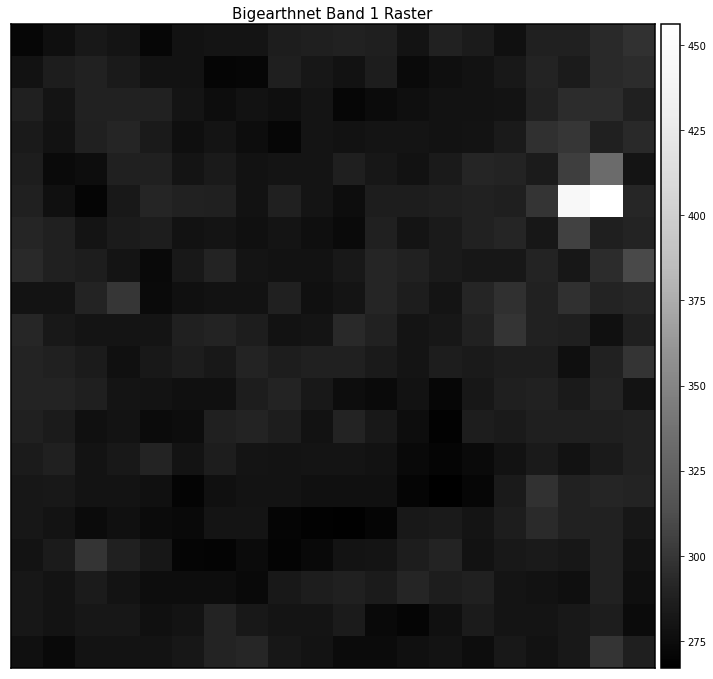

In [10]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
ep.plot_bands(data,
              title="Bigearthnet Band 1 Raster")
plt.show()

In [11]:
#https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html
#rasterio.plot.reshape_as_image(arr)
#Returns the source array reshaped into the order expected by image processing and visualization software (matplotlib, scikit-image, etc) by swapping the axes order from (bands, rows, columns) to (rows, columns, bands)


In [12]:
print('min value:', np.nanmin(data))
print('max value:', np.nanmax(data))

min value: 267
max value: 456


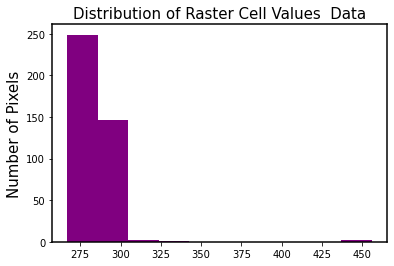

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [14]:
bins=[0, 100, 200, 250, 275, 300,350]

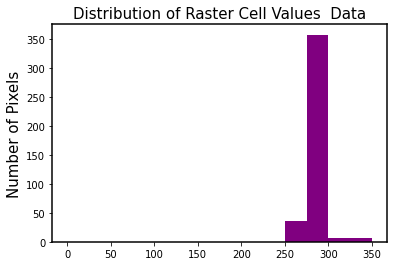

In [15]:
f, ax = plt.subplots()
data.plot.hist(color="purple",bins=[0, 100, 200, 250, 275, 300,350])
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [16]:
class_bins = [-np.inf,250,275,300,350,+np.inf]


In [32]:
import xarray as xr
data_class = xr.apply_ufunc(np.digitize,
                                     data,
                                     class_bins)
print(data_class.shape)
#data_class = np.array(data_class[0])

(1, 20, 20)


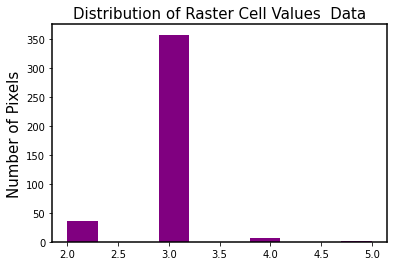

In [33]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data_class.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()